## 7.2 梯度下降和随机梯度下降

### 7.2.1 一维梯度下降

> 1. **假设连续可导$f: \mathbb{R} \rightarrow \mathbb{R}$输入输出都是标量,给足够小的数$\epsilon$,根据泰勒公式**
$$f(x+\epsilon) \approx f(x) + \epsilon f'(x)$$
**$f'(x)$是函数$f$在$x$的梯度,一维函数的梯度是一个标量,也称导数**

> 2. **给一个常数$\eta > 0$使得$\left|\eta f'(x)\right|$足够小,那么可将$\epsilon$替换为$-\eta f'(x)$得到**
$$f(x - \eta f'(x)) \approx f(x) - \eta f'(x)^2$$
**如果$f'(x) \neq 0$,那么 $\eta f'(x)^2 > 0$,所以**
$$f(x - \eta f'(x)) \lesssim f(x)$$
**此时如果迭代$x$**
$$x \leftarrow x - \eta f'(x)$$
**函数$f(x)$的值可能会降低**

> 3. **所以在梯度下降中,先选取一个初始值$x$和常数$\eta > 0$,然后不断迭代$x$,直到达到某种条件停止;例如$f'(x)^2$的值足够小或者迭代次数达到某个值**

In [1]:
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l

目标函数$f(x) = x^2$,初始值$x=10$,$\eta = 0.2$,迭代10次

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= 2 * x * eta
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


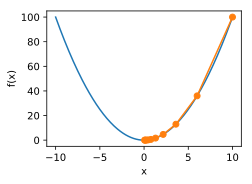

In [7]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')
    
show_trace(res)

### 7.2.2 学习率

> 1. **上述$\eta$就是学习率,过小或导致更新缓慢,**
> 2. **如果过大,$\left| \eta f'(x) \right|$过大使上述一阶泰勒公式展开不在成立,此时无法保证迭代$x$会降低$f(x)$**

epoch 10, x: 3.4867844009999995


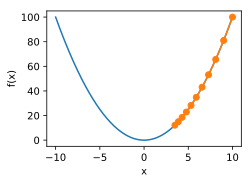

In [8]:
# 使用0.05
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


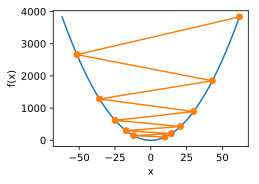

In [9]:
# 使用1.1
show_trace(gd(1.1))

### 7.2.3 多维梯度下降

> 1. **目标输入是向量,输出是标量;假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个$d$维向量$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$**
> 2. **目标函数$f(x)$关于$x$的梯度是由d个偏导数组成的向量**
$$\nabla_{\boldsymbol{x}}f(\boldsymbol{x}) = \bigg[ \frac{\partial f(\boldsymbol{x})}{\partial x_1},  \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d} \bigg]^\top$$
**用$\nabla_f(x)$代替 $\nabla_{\boldsymbol{x}}f(\boldsymbol{x})$,每个偏导元素$\partial f(\boldsymbol{x}) / \partial x_i$表示$f$在$\boldsymbol{x}$有关输入$x_i$的变化率**

> 3. **求$f$沿单位向量$\boldsymbol{u}$(即$||\boldsymbol{u}||=1$)方向上的变化率;所以$f$在$\boldsymbol{x}$沿着$\boldsymbol{u}$方向上的导数**
$$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x}) = \lim_{h \rightarrow 0} \frac{f(\boldsymbol{x} + \boldsymbol{u} \cdot h) - f(\boldsymbol{x})}{h}$$
**即**
$$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}$$
> 4. **方向导数$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x})$给出了$f$在$\boldsymbol{x}$上沿着所有可能方向的变化率;为了$f$最小化,即$f$被最快降低的方向;因此可通过单位向量$\boldsymbol{u}$来最小化方向导数$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x})$**

> 5. **由于$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x}) = ||\nabla f(\boldsymbol{x})|| \cdot ||\boldsymbol{u}|| \cdot \cos(\theta) = ||\nabla f(\boldsymbol{x})|| \cdot \cos(\theta)$,其中$\theta$ 是梯度$\nabla f(\boldsymbol{x})$和单位向量$\boldsymbol{u}$之间夹角;当$\theta=\pi$时,即当$\boldsymbol{u}$在梯度方向$\nabla f(\boldsymbol{x})$相反方向时,方向导数$\text{D}_{\boldsymbol{u}}f(\boldsymbol{x})$最小化**

> 5. **通过梯度下降算法来不断降低目标函数$f$的值;其中$\eta$称为学习率**
$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x})$$

构造一个输入为二维向量$\boldsymbol{x}=[x_1, x_2]^\top$和目标函数$f(\boldsymbol{x})=x_1^2 + 2x_2^2$,则梯度$\nabla f(\boldsymbol{x})=[2x_1, 4x_2]^\top$,并从初始位置$[-5, -2]$开始迭代

In [7]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        # s1, s2是自变量状态
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.0, 1.0, 0.1), np.arange(-3.0, 1.0, 0.2))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1 -0.057646, x2 -0.000073


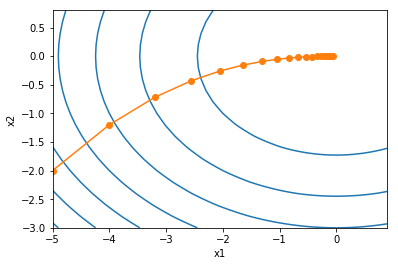

In [8]:
eta = 0.1

def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - 2 * eta * x1, x2 - 4 * eta * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

### 7.2.4 随机梯度下降

> 1. **通常损失函数为各个样本损失函数的平均;$f_i(\boldsymbol{x})$为训练数据样本的损失函数,$n$是样本数,$\boldsymbol{x}$是模型参数向量,则目标函数为**
$$f(\boldsymbol{x}) = \frac{1}{n}\sum_{i=1}^{n}f_i(x)$$
**目标函数在$\boldsymbol{x}$的梯度计算**
$$\nabla f(\boldsymbol{x}) = \frac{1}{n}\sum_{i=1}^{n}\nabla f_i(x) $$
**训练开销随样本数$n$线性增长**

> 2. **随机梯度下降（stochastic gradient descent，SGD）:每次迭代中,随机均匀采样【一个样本索引】$i \in {1, \ldots , n }$**
$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x})$$
**且随机梯度$\nabla f_i(\boldsymbol{x})$是对梯度$\nabla f(\boldsymbol{x})$的无偏估计;即随机梯度是对梯度的一个良好的估计**
$$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n}\sum_{i=1}^{n}\nabla f_i(x) = \nabla f(\boldsymbol{x})$$

In [5]:
def sgd_2d(x1, x2, s1, s2):
    # 增加随机噪音
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)),
                       0, 0)

epoch 20, x1 -0.414651, x2 0.032888


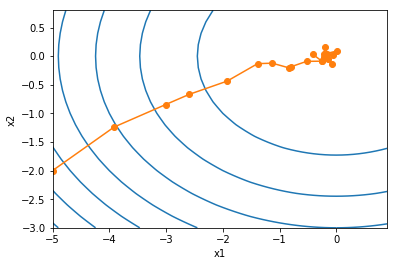

In [9]:
show_trace_2d(f_2d, train_2d(sgd_2d))